# Isolation forest para USDJPY

 

#### Etapas

- Passo 1 - Carregar as bibliotecas
- Passo 2 - Carregar a base de dados
- Passo 3 - Tratamento, entendimento descriçao dos dados
- Passos 4 ao 7 - Treinamento e teste da Isolation Forest
- Passo 8 - MLOps

________________________________________________________

### Passo 1 - carregar as bibliotecas

In [1]:
# Carregando as bibliotecas

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import ta

In [2]:
# Para remover os warnings
import sys 
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

-----------------------------

### Passo 2 - Carregar a base de dados

In [3]:
# Carregando a base de dados e fazendo os checks iniciais

# Muda o diretório de trabalho 
import os
os.chdir("C:\\Users\\User\\Documents\\Bases de dados")

df1=pd.read_csv("USDJPY.csv", sep = ",")

In [4]:
df1.tail()

,1971.01.04,00:00,357.730,357.730.1,357.730.2,357.730.3,1
13867,2022.04.26,00:00,128.018,128.220,127.023,127.425,151643
13868,2022.04.27,00:00,127.422,128.590,126.927,128.308,151368
13869,2022.04.28,00:00,128.308,131.251,128.305,130.882,185099
13870,2022.04.29,00:00,130.883,130.944,129.315,129.759,155214
13871,2022.04.30,00:00,129.759,129.918,129.755,129.892,1887


----------------

### Passo 3 - Tratamento, entendimento e a descrisão dos dados


In [5]:
# Renomeando colunas

df1 = df1.rename(columns={"1971.01.04" : "Data", "00:00" : "Hora", "357.730" : "open", "357.730.1" : "high", "357.730.2" : "low", "357.730.3" : "close", "1": "volume"})



In [6]:
# Ajsutando a data - transformando em indice

df1["Data"] = pd.to_datetime(df1["Data"]).dt.normalize()

df1 = df1.set_index("Data")

df1 = df1.drop(["Hora", "volume"], axis = 1)

In [7]:
df1.head()

,open,high,low,close
Data,,,,
1971-01-05,357.81,357.81,357.81,357.81
1971-01-06,357.86,357.86,357.86,357.86
1971-01-07,357.87,357.87,357.87,357.87
1971-01-08,357.82,357.82,357.82,357.82
1971-01-11,357.95,357.95,357.95,357.95


In [8]:
df1.describe()

,open,high,low,close
count,13872.000000,13872.000000,13872.000000,13872.000000
mean,151.782908,152.130919,151.417919,151.785529
std,69.381048,69.197436,69.572489,69.377818
min,75.694000,75.826000,75.570000,75.737000
25%,107.301750,107.761750,106.900000,107.320000
50%,118.957500,119.431000,118.491000,118.950000
75%,201.432500,201.540000,201.432500,201.507500
max,358.440000,358.440000,358.440000,358.440000


In [9]:
# Lag de x periodos

periodos = 5

# Lag positivo de x periodos
df1["Lag_P5"] = df1["close"].shift(periodos)

In [10]:
# Dummy para saber se o dia atual é Alta(1) ou baixa(0)

df1["High_low"] = np.where(df1["close"] > df1["Lag_P5"], 1, 0)

df1.head(15)

,open,high,low,close,Lag_P5,High_low
Data,,,,,,
1971-01-05,357.81,357.81,357.81,357.81,NaN,0
1971-01-06,357.86,357.86,357.86,357.86,NaN,0
1971-01-07,357.87,357.87,357.87,357.87,NaN,0
1971-01-08,357.82,357.82,357.82,357.82,NaN,0
1971-01-11,357.95,357.95,357.95,357.95,NaN,0
1971-01-12,358.06,358.06,358.06,358.06,357.81,1
1971-01-13,358.44,358.44,358.44,358.44,357.86,1
1971-01-14,358.40,358.40,358.40,358.40,357.87,1
1971-01-15,358.40,358.40,358.40,358.40,357.82,1


In [11]:
df1["High_low"].mean()

0.5059111880046137

In [12]:
# Calculo do retorno

df1["Retorno"] = df1["close"].pct_change(periodos)

df1.tail(15)

,open,high,low,close,Lag_P5,High_low,Retorno
Data,,,,,,,
2022-04-14,125.677,126.014,125.080,125.942,124.349,1,0.012811
2022-04-15,125.942,126.685,125.845,126.372,124.281,1,0.016825
2022-04-16,126.371,126.502,126.335,126.356,125.400,1,0.007624
2022-04-18,126.312,126.980,126.231,126.940,125.331,1,0.012838
2022-04-19,126.939,128.975,126.933,128.864,125.677,1,0.025359
2022-04-20,128.865,129.400,127.458,127.713,125.942,1,0.014062
2022-04-21,127.719,128.704,127.719,128.281,126.372,1,0.015106
2022-04-22,128.281,129.111,127.737,128.535,126.356,1,0.017245
2022-04-23,128.536,128.566,128.462,128.537,126.940,1,0.012581


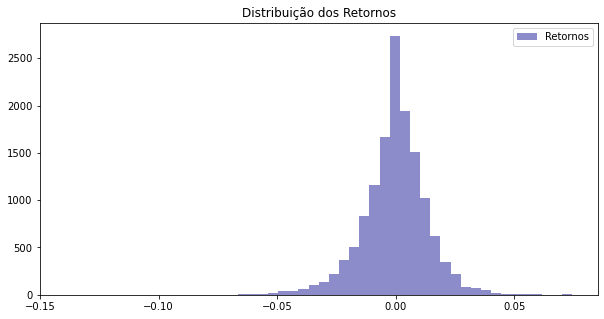

In [13]:
plt.figure(figsize = (10, 5))
plt.hist(df1["Retorno"], bins = 50
            , alpha = 0.45
            , histtype=  "stepfilled"
            , color = "darkblue"
            , edgecolor = "none"
            , label = "Retornos");

plt.legend()
plt.title("Distribuição dos Retornos");

In [14]:
df1["Retorno"].describe()

count    13867.000000
mean        -0.000270
std          0.013915
min         -0.139432
25%         -0.006937
50%          0.000177
75%          0.007380
max          0.074555
Name: Retorno, dtype: float64

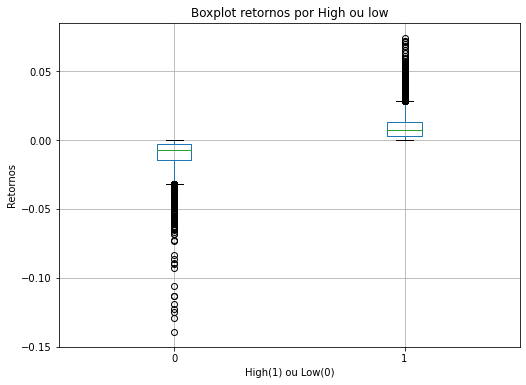

In [15]:
df1.boxplot(by = "High_low", column= ["Retorno"], grid = True, figsize = (8,6));
title = "Boxplot retornos por High ou low"
plt.title(title)
plt.suptitle("")
plt.ylabel("Retornos")
plt.xlabel("High(1) ou Low(0)")
plt.show()

In [16]:
# Adicionando um alvo

df1["Alvo1"] = df1["Retorno"].shift(-periodos)
df1["Alvo1_Bin"] = np.where(df1["Alvo1"] > 0 , 1, 0)

In [17]:
# Quadrantes 

q1 = round(np.sum((df1.Retorno >= 0)&(df1.Alvo1 >= 0))/df1["Retorno"].describe()[0]*100, 1)
q2 = round(np.sum((df1.Retorno < 0) & (df1.Alvo1 > 0))/ df1["Retorno"].describe()[0]*100, 1)
q3 = round(np.sum((df1.Retorno < 0) & (df1.Alvo1 < 0))/df1["Retorno"].describe()[0]*100, 1)
q4 = round( np.sum((df1.Retorno > 0) & (df1.Alvo1 <= 0))/df1["Retorno"].describe()[0]*100,1)

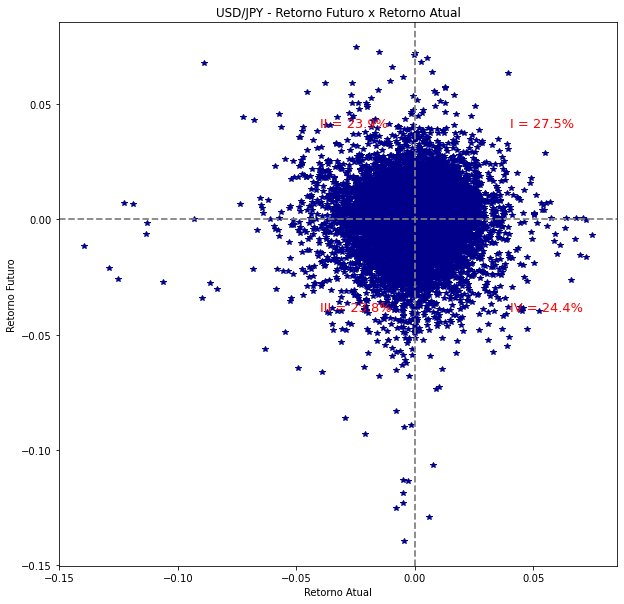

In [18]:
plt.figure(figsize = (10,10))
plt.plot(df1["Retorno"], df1["Alvo1"], "*", color = "darkblue", label = "aleatorio")
setup = dict(size = 13, color = "red")
setup2 = dict(color = "gray", linestyle = "--", linewidth = 1.75)
plt.axvline(0, **setup2)
plt.axhline(0, **setup2)
plt.text(0.04, 0.04, ("I = " + str(q1) + "%"), **setup);
plt.text(-0.04, 0.04, ("II = " + str(q2) + "%"), **setup);
plt.text(-0.04, -0.04, ("III = " + str(q3) + "%"), **setup);
plt.text(0.04, -0.04, ("IV = " + str(q4)) + "%", **setup);
plt.ylabel("Retorno Futuro")
plt.xlabel("Retorno Atual")
plt.title("USD/JPY - Retorno Futuro x Retorno Atual");

In [19]:
# Trabalhando além dos 2 desvios para pegar outliers

dois_dp = round((df1["Retorno"].describe()[1] + 2*df1["Retorno"].describe()[2]), 3)

dois_dp

0.028

In [20]:
q1_out = round(np.sum(((df1.Retorno >= dois_dp) & (df1.Alvo1 >= 0))
                | ((df1.Retorno >= 0) & (df1.Alvo1 >= dois_dp)))/ df1["Retorno"].describe()[0]*100, 1)
q2_out = round(np.sum(((df1.Retorno < -dois_dp) & (df1.Alvo1 >= 0))
                     | ((df1.Retorno < 0) & (df1.Alvo1 >= dois_dp)))/df1["Retorno"].describe()[0]*100, 1)
q3_out = round(np.sum(((df1.Retorno < 0) & (df1.Alvo1 < -dois_dp))
                     | ((df1.Retorno <-dois_dp) & (df1.Alvo1 < 0)))/df1["Retorno"].describe()[0]*100, 1)
q4_out = round(np.sum(((df1.Retorno > dois_dp) & (df1.Alvo1 < 0))
                     | ((df1.Retorno > 0) & (df1.Alvo1 < -dois_dp)))/df1["Retorno"].describe()[0]*100, 1)           

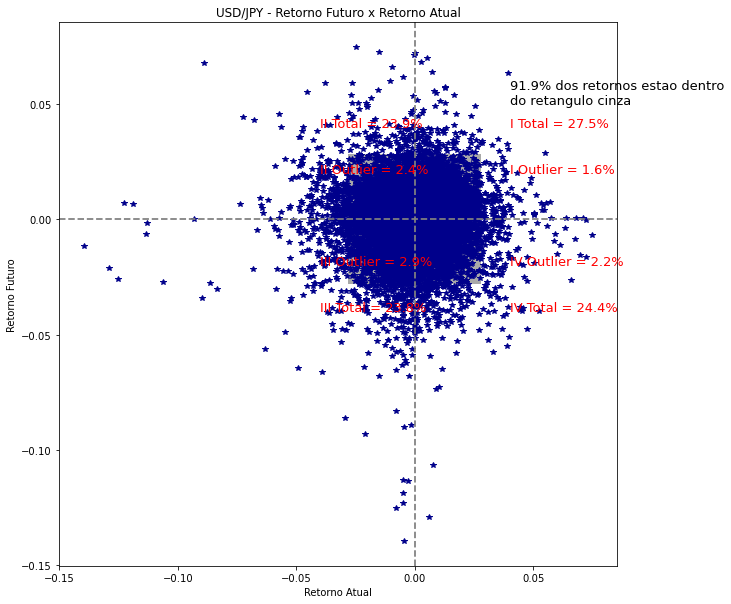

In [21]:
plt.figure(figsize = (10,10))
plt.plot(df1["Retorno"], df1["Alvo1"], "*", color = "darkblue", label = "aleatorio")

setup = dict(size = 13, color = "red")
setup2 = dict(color = "gray", linestyle = "--", linewidth = 1.75)

setup3 = dict(size = 13, color = "black")
retangulo = plt.gca()
retangulo.add_patch(Rectangle((-dois_dp , -dois_dp), 2*dois_dp, 2*dois_dp, facecolor = "darkgray"))

plt.axvline(0, **setup2)
plt.axhline(0, **setup2)

plt.text(0.04, 0.05, ("91.9% dos retornos estao dentro\ndo retangulo cinza"), **setup3);


plt.text(0.04, 0.04, ("I Total = " + str(q1) + "%"), **setup);
plt.text(-0.04, 0.04, ("II Total = " + str(q2) + "%"), **setup);
plt.text(-0.04, -0.04, ("III Total = " + str(q3) + "%"), **setup);
plt.text(0.04, -0.04, ("IV Total = " + str(q4)) + "%", **setup);

plt.text(0.04, 0.02, ("I Outlier = " + str(q1_out) + "%"), **setup);
plt.text(-0.04, 0.02, ("II Outlier = " + str(q2_out) + "%"), **setup);
plt.text(-0.04, -0.02, ("III Outlier = " + str(q3_out) + "%"), **setup);
plt.text(0.04, -0.02, ("IV Outlier = " + str(q4_out)) + "%", **setup);

plt.ylabel("Retorno Futuro")
plt.xlabel("Retorno Atual")
plt.title("USD/JPY - Retorno Futuro x Retorno Atual");

In [22]:
df1["High_low_P5"] = df1["High_low"].shift(periodos).fillna(0).apply(int)

df1["High_low_P5"].dtypes

dtype('int64')

In [23]:
df1.head()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5
Data,,,,,,,,,,
1971-01-05,357.81,357.81,357.81,357.81,NaN,0,NaN,0.000699,1,0
1971-01-06,357.86,357.86,357.86,357.86,NaN,0,NaN,0.001621,1,0
1971-01-07,357.87,357.87,357.87,357.87,NaN,0,NaN,0.001481,1,0
1971-01-08,357.82,357.82,357.82,357.82,NaN,0,NaN,0.001621,1,0
1971-01-11,357.95,357.95,357.95,357.95,NaN,0,NaN,0.000950,1,0


In [24]:
# Concatenação dos valores

df1["R_r"] = df1["High_low_P5"].apply(str).str.cat(df1["High_low"].apply(str), " - ")

In [25]:
df1.tail()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,R_r
Data,,,,,,,,,,,
2022-04-26,128.018,128.220,127.023,127.425,127.713,0,-0.002255,NaN,0,1,1 - 0
2022-04-27,127.422,128.590,126.927,128.308,128.281,1,0.000210,NaN,0,1,1 - 1
2022-04-28,128.308,131.251,128.305,130.882,128.535,1,0.018260,NaN,0,1,1 - 1
2022-04-29,130.883,130.944,129.315,129.759,128.537,1,0.009507,NaN,0,1,1 - 1
2022-04-30,129.759,129.918,129.755,129.892,128.016,1,0.014654,NaN,0,0,0 - 1


In [26]:
# Mostra a quantidade absoluta de ocorrencia dos eventos

df1["R_r"].value_counts()

1 - 1    3628
0 - 0    3468
0 - 1    3390
1 - 0    3386
Name: R_r, dtype: int64

In [27]:
# Mostrand o percentual de ocorrencia de cada evento

round(df1["R_r"].value_counts()/df1.shape[0]*100, 2)

1 - 1    26.15
0 - 0    25.00
0 - 1    24.44
1 - 0    24.41
Name: R_r, dtype: float64

In [28]:
# Mostra a média do retorno futuro para cada evento

print(round(df1[df1["R_r"] == "0 - 1"].mean()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 1"].mean()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "0 - 0"].mean()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 0"].mean()["Alvo1"]*100, 2))

-0.04
0.1
-0.17
-0.01


In [29]:
# Mostra a média de dias positivos apòs cada evento

print(round(df1[df1["R_r"] == "0 - 1"].mean()["Alvo1_Bin"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 1"].mean()["Alvo1_Bin"]*100, 2))
print(round(df1[df1["R_r"] == "0 - 0"].mean()["Alvo1_Bin"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 0"].mean()["Alvo1_Bin"]*100, 2))

49.0
54.22
46.74
52.24


In [30]:
# Mostra a média do retorno futuro para cada evento

print(round(df1[df1["R_r"] == "0 - 1"].sum()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 1"].sum()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "0 - 0"].sum()["Alvo1"]*100, 2))
print(round(df1[df1["R_r"] == "1 - 0"].sum()["Alvo1"]*100, 2))

-132.44
370.51
-587.94
-23.98


In [31]:
# Vamos isolar e analisar apenas o padrao "0 - 0"

acc_0_0 = np.where(df1["R_r"] == "1 - 1", df1["Alvo1"], 0)

In [32]:
# Criando um dataframe para esta analise

df_0_0 = pd.DataFrame(acc_0_0, columns = ["Acc_0_0"], index = df1.index.values)

In [33]:
# Para fazer um conditional plot

df_0_0.index.name = "Date"
df_0_0.reset_index(inplace = True)

df_0_0["Date"] = pd.to_datetime(df_0_0["Date"])

In [34]:
# Adicionando retorno acumulado

f_0_0 = df_0_0.resample("M", on = "Date").sum()

df_0_0.loc[: , "Retorno_Acumulado"] = df_0_0["Acc_0_0"].cumsum()*100

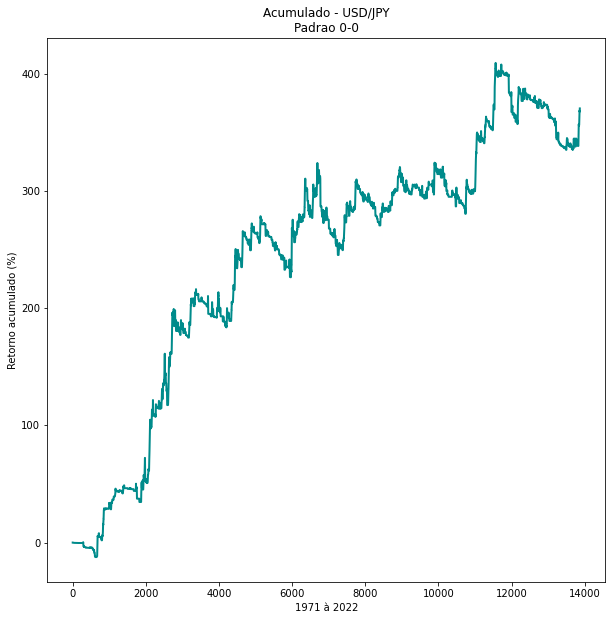

In [35]:
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10,10))
    plt.plot(df_0_0.index.values, df_0_0["Retorno_Acumulado"], color = "darkcyan", linewidth = 2)
    plt.xlabel("1971 à 2022")
    plt.ylabel("Retorno acumulado (%)")
    plt.title("Acumulado - USD/JPY\nPadrao 0-0")

In [36]:
# Vamos fazer uma analise semelhante, mas apenas com os valores
# acima de dois desvios

df_dois_dp = df1[(df1["Retorno"] >= dois_dp) | (df1["Retorno"] <= -dois_dp)]

In [37]:
df_dois_dp.tail()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,R_r
Data,,,,,,,,,,,
2020-03-23,110.779,111.596,109.663,111.307,107.681,1,0.033674,-0.029935,0,1,1 - 1
2020-03-24,111.307,111.711,110.081,111.502,108.109,1,0.031385,-0.031452,0,1,1 - 1
2020-03-28,107.896,107.991,107.861,107.975,111.307,0,-0.029935,0.004094,1,1,1 - 0
2020-03-30,107.676,108.293,107.120,107.995,111.502,0,-0.031452,0.004269,1,1,1 - 0
2020-03-31,107.996,108.725,107.458,107.511,111.175,0,-0.032957,0.015254,1,1,1 - 0


In [38]:
# Mostra o percentual de ocorrencia dos eventos

round(df_dois_dp["R_r"].value_counts()/df_dois_dp.shape[0]*100, 2)

0 - 0    35.13
1 - 0    28.57
0 - 1    19.10
1 - 1    17.20
Name: R_r, dtype: float64

In [39]:
# Mostra a média do retorno futuro para cada evento

print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 1"].mean()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 1"].mean()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 0"].mean()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 0"].mean()["Alvo1"]*100, 2))

-0.48
-0.5
-0.19
0.28


In [40]:
# Mostra a média de dias positivos apòs cada evento

print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 1"].mean()["Alvo1_Bin"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 1"].mean()["Alvo1_Bin"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 0"].mean()["Alvo1_Bin"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 0"].mean()["Alvo1_Bin"]*100, 2))

41.98
45.76
49.38
57.65


In [41]:
# Mostra a soma do retorno futuro para cada evento

print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 1"].sum()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 1"].sum()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "0 - 0"].sum()["Alvo1"]*100, 2))
print(round(df_dois_dp[df_dois_dp["R_r"] == "1 - 0"].sum()["Alvo1"]*100, 2))

-62.79
-58.95
-46.67
54.53


In [42]:
# Vamos isolar e analisar apenas o padrao "1 - 0"

acc_0_0 = np.where(df_dois_dp["R_r"] == "1 - 0", df_dois_dp["Alvo1"], 0)

In [43]:
# Criando um dataframe para esta analise

df_0_01 = pd.DataFrame(acc_0_0, columns = ["Acc_0_0"], index = df_dois_dp.index.values)

In [44]:
# Para fazer um conditional plot

df_0_01.index.name = "Date"
df_0_01.reset_index(inplace = True)

df_0_01["Date"] = pd.to_datetime(df_0_01["Date"])

In [45]:
df_0_01 = df_0_01.resample("M", on = "Date").sum()

df_0_01.loc[: , "Retorno_Acumulado"] = df_0_01["Acc_0_0"].cumsum()*100

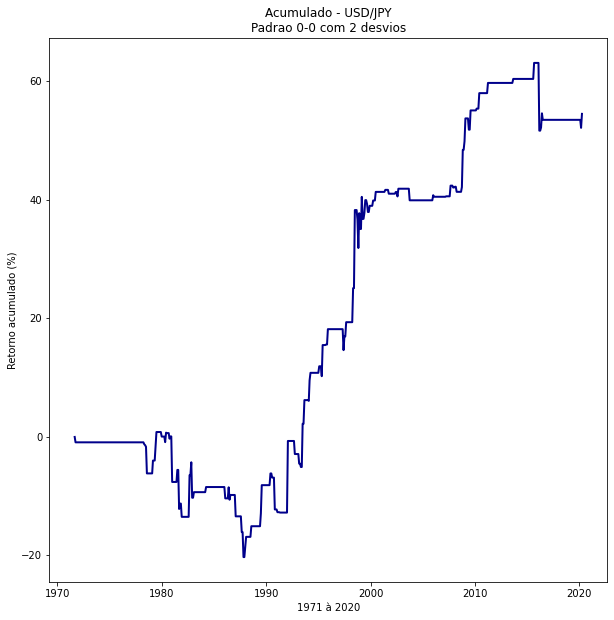

In [46]:
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10,10))
    plt.plot(df_0_01.index.values, df_0_01["Retorno_Acumulado"], color = "darkblue", linewidth = 2)
    plt.xlabel("1971 à 2020")
    plt.ylabel("Retorno acumulado (%)")
    plt.title("Acumulado - USD/JPY\nPadrao 0-0 com 2 desvios")

In [47]:
print(df1["R_r"].value_counts())
print("")
print(df_dois_dp["R_r"].value_counts())

1 - 1    3628
0 - 0    3468
0 - 1    3390
1 - 0    3386
Name: R_r, dtype: int64

0 - 0    241
1 - 0    196
0 - 1    131
1 - 1    118
Name: R_r, dtype: int64


In [48]:

print(df_0_01.loc[: , "Retorno_Acumulado"].tail(1).values)

[54.52565184]


In [49]:
# eficiencia média por trade 


print(df_0_01.loc[: , "Retorno_Acumulado"].tail(1).values/df1["R_r"].value_counts()[1])

[0.01572251]


### Passo 4 - Construção dos Alvos e variaveis

In [50]:
# Variaçao em Pontos do alvo
df1["Pontos"] = (df1["close"] - df1["close"].shift(1))
df1["Pontos"] = df1["Pontos"].shift(-periodos)

In [51]:
# Construçao das Variaveis

# Desvio Padrao de 5 dias
df1["std5"] = df1["Retorno"].rolling(5).std()

# Desvio Padrao de 10 dias
df1["std10"] = df1["Retorno"].rolling(10).std()

# Desvio Padrao de 15 dias
df1["std15"] = df1["Retorno"].rolling(15).std()

# Proporçao do corpo do candle em relacao ao range do dia
df1["prop"] = (df1["close"]-df1["open"])/(df1["high"]-df1["low"])

# Direçao do dia atual
df1["dir_D"] = np.where(df1['close'] > df1['open'] , '1', '0')

# Direçao D-1
df1["dir_D-1"] = df1["dir_D"].shift(1)

# Direçao D-2
df1["dir_D-2"] = df1["dir_D"].shift(2)

# Direçao D-3
df1["dir_D-3"] = df1["dir_D"].shift(3)

# Media Movel de 15 dias std5
df1["mm_std5"] = df1["std5"].rolling(15).mean()

# Media Movel de 15 dias std5
df1["mm_std10"] = df1["std10"].rolling(15).mean()

# Media Movel de 15 dias std5
df1["mm_std15"] = df1["std15"].rolling(15).mean()

# RSL std5
df1["RSL_std5"] = (df1["std5"]/df1["std5"].rolling(15).mean())-1

# RSL std10
df1["RSL_std10"] = (df1["std10"]/df1["std10"].rolling(15).mean())-1

# RSL std15
df1["RSL_std15"] = (df1["std15"]/df1["std15"].rolling(15).mean())-1

# Aplicando a fisica

p = 5 

# Velocidade de p dias
df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

# Aceleraçao de p dias
df1["a"] = (df1["v"] - df1["v"].shift(p))/p

# Força
# Calculando a massa
df1["m"] = df1["Retorno"].rolling(p).sum()
df1["f"] = df1["m"]*df1["a"]

# Energia cinética
df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]


# Trabalho 
# cateto_oposto
cat_op = df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
cat_ad = p
df1["cat"] = cat_op/cat_ad
df1 = df1.dropna(axis = 0)
df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

# Energia potencial
df1["k"] = cat_op*df1["m"]

# Torque
df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

# Momentum
df1["M"] = df1["m"]*df1["v"]

# Gravidade
df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())

# Para o zig zag dos retornos
df1["Retorno1"] = df1["Retorno"].shift(1)
df1["Retorno2"] = df1["Retorno"].shift(2)

df1["Zigzag_alta"] = np.where(((df1["Retorno"] > 0) & (df1["Retorno1"] < 0) & (df1["Retorno2"] > 0)), 1, 0)
df1["Zigzag_baixa"] = np.where(((df1["Retorno"] < 0) & (df1["Retorno1"] > 0) & (df1["Retorno2"] < 0)), -1, 0)
df1["Zigzag"] = df1["Zigzag_alta"] + df1["Zigzag_baixa"]

# Resistencia - R=V/I onde V é a amplitude maxima dos ultimos retornos
# Novo periodo
p = 5

df1["V_Max"] = df1["Retorno"].rolling(p).max()
df1["V_Min"] = df1["Retorno"].rolling(p).min()
df1["I"] = df1["Retorno"].rolling(p).sum()
df1.head(10)

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,...,M,g,Retorno1,Retorno2,Zigzag_alta,Zigzag_baixa,Zigzag,V_Max,V_Min,I
Data,,,,,,,,,,,,,,,,,,,,,
1985-01-01,250.10,252.51,250.10,251.80,247.40,1,0.017785,0.007744,1,0,...,0.000074,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
1985-01-21,253.90,253.90,253.30,253.40,255.40,0,-0.007831,0.003078,1,0,...,-0.000002,NaN,0.017785,NaN,0,0,0,NaN,NaN,NaN
1985-02-12,261.40,263.50,261.40,262.95,259.70,1,0.012514,-0.008557,0,1,...,-0.000135,NaN,-0.007831,0.017785,1,0,1,NaN,NaN,NaN
1985-02-18,255.45,260.15,255.40,255.45,261.65,0,-0.023696,0.028186,1,1,...,0.000065,NaN,0.012514,-0.007831,0,-1,-1,NaN,NaN,NaN
1985-03-25,255.55,256.95,255.50,256.90,259.90,0,-0.011543,-0.017322,0,1,...,0.000237,0.001079,-0.023696,0.012514,0,0,0,0.017785,-0.023696,-0.012770
1985-03-26,256.90,257.00,254.68,255.33,256.30,0,-0.003785,-0.004034,0,0,...,-0.000160,0.002530,-0.011543,-0.023696,0,0,0,0.012514,-0.023696,-0.034340
1985-03-27,255.33,255.33,251.60,253.68,256.40,0,-0.010608,-0.002089,0,0,...,-0.000058,0.002580,-0.003785,-0.011543,0,0,0,0.012514,-0.023696,-0.037117
1985-03-28,253.68,253.68,251.80,252.80,254.10,0,-0.005116,0.006725,1,0,...,-0.000196,0.002730,-0.010608,-0.003785,0,0,0,-0.003785,-0.023696,-0.054748
1985-03-29,252.80,253.00,249.00,250.60,255.65,0,-0.019754,0.016959,1,0,...,0.000010,0.002581,-0.005116,-0.010608,0,0,0,-0.003785,-0.019754,-0.050806


In [52]:
# Variaveis de Indicadores técnicos - Biblioteca TA

# Inicializa o indicador
indicator_atr14 = ta.volatility.AverageTrueRange(high = df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14)

indicator_bb = ta.volatility.bollinger_wband(close = df1["close"], window = 20, window_dev = 2)
indicator_rsi14 = ta.momentum.RSIIndicator(close = df1["close"], window = 14)
indicator_rsi2 = ta.momentum.RSIIndicator(close = df1["close"], window = 2)
indicator_stoc = ta.momentum.StochasticOscillator(high= df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14, smooth_window = 3)
indicator_adx = ta.trend.ADXIndicator(high = df1["high"], low= df1["low"], close = df1["close"], window= 14)
indicator_ichimoko = ta.trend.IchimokuIndicator(high= df1["high"], low = df1["low"], window1 = 9, window2 = 26, window3= 52)
indicator_macd  =ta.trend.MACD(close= df1["close"], window_slow = 26, window_fast = 12, window_sign = 9)
indicator_ema = ta.trend.EMAIndicator(close = df1["close"], window= 9)
# Variavel abertura das bandas
df1["abertura_bb"] = indicator_bb
df1["RSI14"] = indicator_rsi14.rsi()
df1["RSI2"] = indicator_rsi2.rsi()
df1["STOC"] = indicator_stoc.stoch()
df1["ATR14"] = indicator_atr14.average_true_range()
df1["ADX"] = indicator_adx.adx()
df1["EMA"] = indicator_ema.ema_indicator()
df1["ICK"] = indicator_ichimoko.ichimoku_a()
df1["MACD"] = indicator_macd.macd()

In [53]:
# Filtrando os valores missing

df1_filtrado = df1.dropna(axis = 0) 

df1_filtrado = df1_filtrado.drop(["mm_std5", "mm_std10", "mm_std15", "Retorno1"
                                  , "Retorno2", "Zigzag_alta", "Zigzag_baixa"
                                 ], axis = 1)

df2 = df1_filtrado.copy()

In [54]:
corte = 5

In [55]:


df1_filtrado["RSL_std5"] = pd.qcut(df1_filtrado["RSL_std5"], corte, labels = False)
df1_filtrado["RSL_std10"] = pd.qcut(df1_filtrado["RSL_std10"], corte, labels = False)
df1_filtrado["RSL_std15"] = pd.qcut(df1_filtrado["RSL_std15"], corte, labels = False)
df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)

In [56]:
df1_filtrado.head()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,...,I,abertura_bb,RSI14,RSI2,STOC,ATR14,ADX,EMA,ICK,MACD
Data,,,,,,,,,,,,,,,,,,,,,
1987-01-02,158.2,158.65,157.75,158.65,162.75,0,-0.025192,-0.001891,0,1,...,-0.066735,75.464241,16.622442,38.791003,8.619314,5.854186,0.000000,168.097929,187.9750,-24.273890
1987-01-05,158.7,159.75,158.25,159.40,162.70,0,-0.020283,-0.012233,0,0,...,-0.087927,74.703102,17.613624,54.054715,11.680912,5.543172,0.000000,166.358343,185.0025,-23.700303
1987-01-06,159.4,159.40,158.60,158.70,163.05,0,-0.026679,-0.019219,0,1,...,-0.101673,72.690095,17.405647,36.885044,11.088505,5.204374,70.570050,164.826674,183.2825,-23.036662
1987-01-07,158.7,158.70,157.40,158.05,163.25,0,-0.031853,-0.036065,0,1,...,-0.131989,69.389657,17.202523,23.199693,9.766022,4.925490,70.018576,163.471339,182.4450,-22.306042
1987-01-08,158.1,158.75,157.60,157.60,158.05,0,-0.002847,-0.027919,0,0,...,-0.106854,63.843117,17.054141,15.326178,8.850458,4.655812,69.496402,162.297072,181.7975,-21.515316


In [57]:
pd.crosstab(pd.qcut(df1["T"], corte, labels = False), df1_filtrado["Alvo1_Bin"])/df1.shape[0]*100

Alvo1_Bin,0,1
T,,
0,10.007990,9.918098
1,9.318817,10.637235
2,9.758290,10.187775
3,9.718338,10.237715
4,9.478626,10.487415


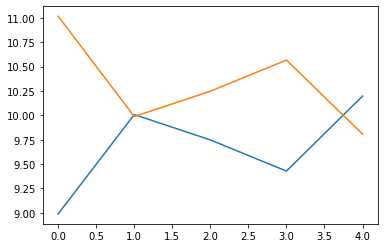

In [58]:
# Queremos um grafico ascendente ou descendente
plt.plot(pd.crosstab(pd.qcut(df1["tau"], corte, labels = False), df1["Alvo1_Bin"])/df1.shape[0]*100);

In [59]:
df1_filtrado.tail()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,...,I,abertura_bb,RSI14,RSI2,STOC,ATR14,ADX,EMA,ICK,MACD
Data,,,,,,,,,,,,,,,,,,,,,
2022-04-20,128.865,129.400,127.458,127.713,125.942,1,0.014062,-0.002255,0,1,...,0.076707,6.295764,75.963171,49.997853,76.009670,1.041139,72.816092,126.575461,125.56125,2.022554
2022-04-21,127.719,128.704,127.719,128.281,126.372,1,0.015106,0.000210,1,1,...,0.074988,6.635128,77.698955,66.494572,81.177460,1.037558,73.848789,126.916569,126.03875,2.048910
2022-04-22,128.281,129.111,127.737,128.535,126.356,1,0.017245,0.018260,1,1,...,0.084610,6.647826,78.448448,74.128471,85.420529,1.061589,74.861201,127.240255,126.20750,2.066472
2022-04-23,128.536,128.566,128.462,128.537,126.940,1,0.012581,0.009507,1,1,...,0.084353,6.476428,78.454588,74.220968,84.973011,0.993190,75.801298,127.499604,126.26450,2.056841
2022-04-25,128.553,128.866,127.521,128.016,128.864,0,-0.006581,0.014654,1,1,...,0.052413,6.267720,72.648070,25.927033,74.308521,1.018319,74.844287,127.602883,126.48150,1.984295


---------------------------------
### Passo 5 - Preparaçao da base para treinamento e teste

In [60]:
# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 1987 à 2002
start_train = "1987-01-02"
end_train = "2002-12-31"

# Vamos testar o modelo de 2003 à 2022
start_test = "2003-01-01"
end_test = "2022-04-25"

df1_train1 = df1_filtrado.loc[start_train : end_train]

df1_test1 = df1_filtrado.loc[start_test : end_test]

In [61]:
df1_filtrado.columns[12:46]

Index(['std5', 'std10', 'std15', 'prop', 'dir_D', 'dir_D-1', 'dir_D-2',
       'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15', 'v', 'a', 'm', 'f',
       'T', 'cat', 'w', 'k', 'tau', 'M', 'g', 'Zigzag', 'V_Max', 'V_Min', 'I',
       'abertura_bb', 'RSI14', 'RSI2', 'STOC', 'ATR14', 'ADX', 'EMA', 'ICK'],
      dtype='object')

In [62]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df1_train1.iloc[:, 12:df1_filtrado.shape[1]]
y_train1 = df1_train1['Alvo1_Bin']

x_test1 = df1_test1.iloc[:, 12:df1_filtrado.shape[1]]
y_test1 = df1_test1['Alvo1_Bin']

--------------
### Passo 6 -Treinamento do modelo

In [63]:
# Treinando o modelo

if1_USDJPY = IsolationForest(max_samples = 200, random_state = 42)

if1_USDJPY.fit(x_train1) # essa é a linha que treina o modelo!!!!

IsolationForest(max_samples=200, random_state=42)

In [64]:
# Prediçoes para o treinamento e teste

y_pred_train1 = if1_USDJPY.predict(x_train1)
y_pred_test1 = if1_USDJPY.predict(x_test1)

# Returns -1 for outliers and 1 for inliers.
y_pred_train1 = np.where(y_pred_train1 == -1, 1, 0)
y_pred_test1 = np.where(y_pred_test1 == -1, 1, 0)

------------

### Passo 7 - Avaliação dos resultados

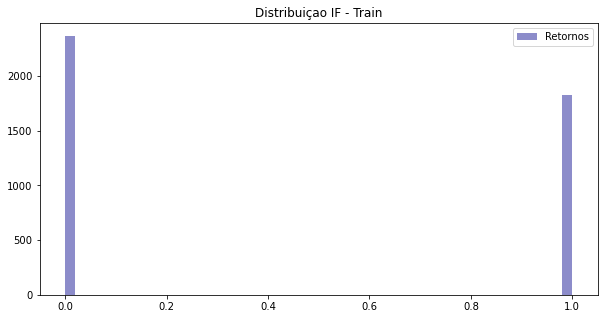

In [65]:
plt.figure(figsize = (10,5))
plt.hist(y_pred_train1, bins = 50
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Retornos");

plt.legend()
plt.title("Distribuiçao IF - Train");

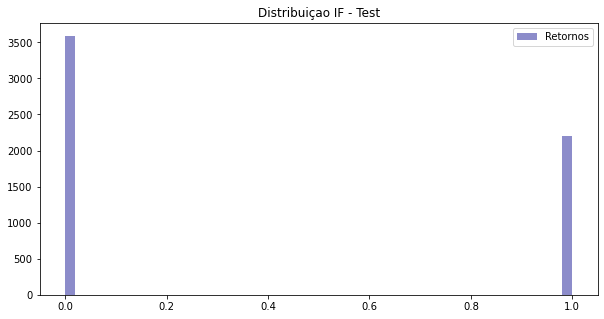

In [66]:
plt.figure(figsize = (10,5))
plt.hist(y_pred_test1, bins = 50
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Retornos");

plt.legend()
plt.title("Distribuiçao IF - Test");

In [67]:
# Treinamento

print(confusion_matrix(y_train1, y_pred_train1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train1, y_pred_train1))

[[1097  903]
 [1270  928]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.46      0.55      0.50      2000
           1       0.51      0.42      0.46      2198

    accuracy                           0.48      4198
   macro avg       0.49      0.49      0.48      4198
weighted avg       0.49      0.48      0.48      4198



In [68]:
# Teste

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[1769 1065]
 [1820 1135]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.49      0.62      0.55      2834
           1       0.52      0.38      0.44      2955

    accuracy                           0.50      5789
   macro avg       0.50      0.50      0.50      5789
weighted avg       0.50      0.50      0.49      5789



In [69]:
# Calculando a performance - para toda a base

y_pred_all = if1_USDJPY.predict(df1_filtrado.iloc[:, 12:47])

y_pred_all = np.where(y_pred_all == -1, 1, 0)

In [70]:
df1_filtrado.loc[: , "Previsto"] = y_pred_all
df1_filtrado.loc[: , "Retorno_Modelo"] = df1_filtrado.loc[: , "Previsto"]*df1_filtrado["Alvo1"]

#Simulando um stop de 2%

stop = 0.0
df1_filtrado.loc[: , "Retorno_Modelo"] = np.where(df1_filtrado.loc[: , 'Retorno_Modelo'] < -stop
                                               , -stop, df1_filtrado.loc[: , 'Retorno_Modelo'])

df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"] = df1_filtrado["Retorno_Modelo"].cumsum()

In [71]:
df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"].tail()

Data
2022-04-20    23.624740
2022-04-21    23.624951
2022-04-22    23.643210
2022-04-23    23.652717
2022-04-25    23.667372
Name: Retorno_Modelo_Acumulado, dtype: float64

In [72]:
# Para fazer um conditional plot

df1_filtrado.index.name = "Date"
df1_filtrado.reset_index(inplace = True)

df1_filtrado["Date"] = pd.to_datetime(df1_filtrado["Date"])

df1_filtrado["train_test"] = np.where(df1_filtrado["Date"] > end_train, 1, -1)

In [73]:
df1_filtrado.head()

,Date,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,...,STOC,ATR14,ADX,EMA,ICK,MACD,Previsto,Retorno_Modelo,Retorno_Modelo_Acumulado,train_test
0,1987-01-02,158.2,158.65,157.75,158.65,162.75,0,-0.025192,-0.001891,0,...,8.619314,5.854186,0.000000,168.097929,187.9750,-24.273890,1,-0.0,-0.0,-1
1,1987-01-05,158.7,159.75,158.25,159.40,162.70,0,-0.020283,-0.012233,0,...,11.680912,5.543172,0.000000,166.358343,185.0025,-23.700303,1,-0.0,-0.0,-1
2,1987-01-06,159.4,159.40,158.60,158.70,163.05,0,-0.026679,-0.019219,0,...,11.088505,5.204374,70.570050,164.826674,183.2825,-23.036662,1,-0.0,-0.0,-1
3,1987-01-07,158.7,158.70,157.40,158.05,163.25,0,-0.031853,-0.036065,0,...,9.766022,4.925490,70.018576,163.471339,182.4450,-22.306042,1,-0.0,-0.0,-1
4,1987-01-08,158.1,158.75,157.60,157.60,158.05,0,-0.002847,-0.027919,0,...,8.850458,4.655812,69.496402,162.297072,181.7975,-21.515316,1,-0.0,-0.0,-1


In [74]:
base_agregada = df1_filtrado.resample("M", on = "Date").sum()

base_agregada.loc[: , "Retorno_Modelo_Acumulado"] = base_agregada["Retorno_Modelo"].cumsum()*100

""


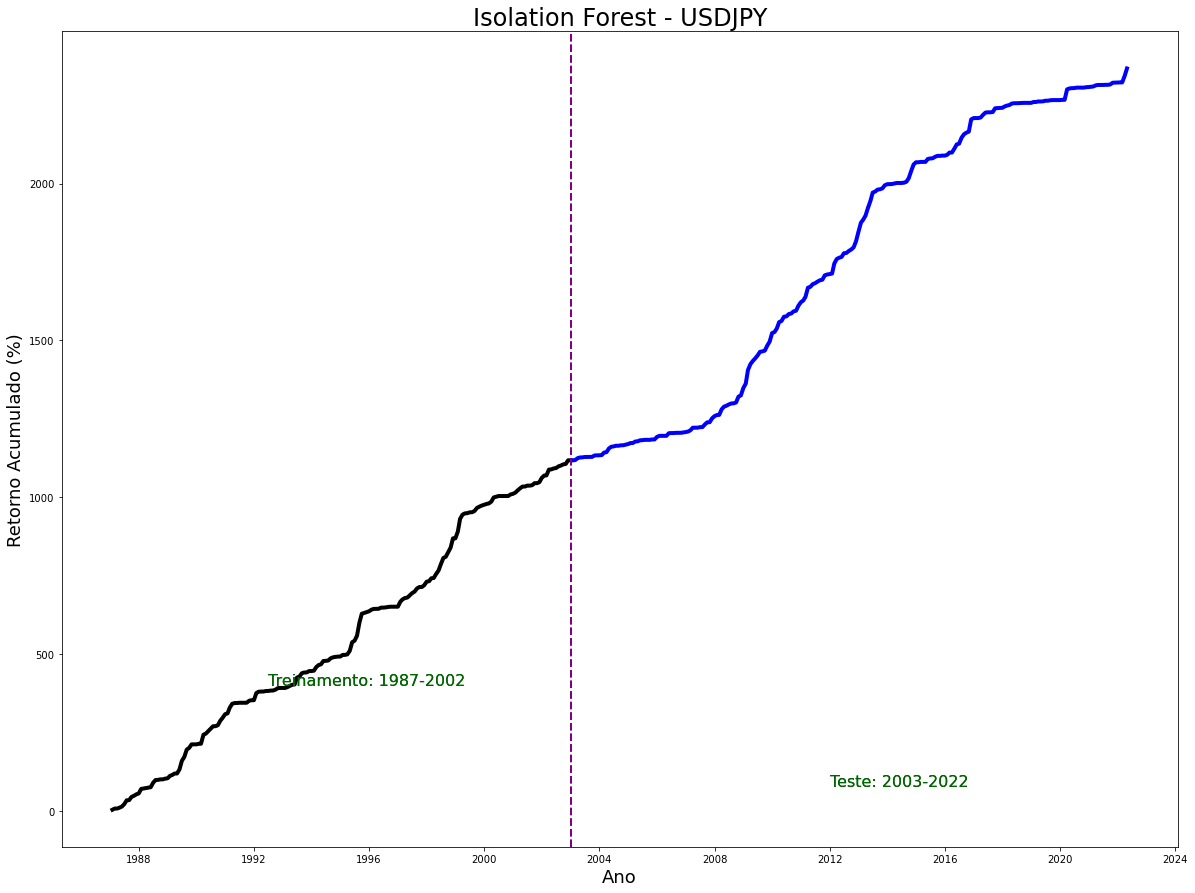

In [75]:
import datetime

# Plota o grafico
fig, ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["train_test"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.Retorno_Modelo_Acumulado, c=color, linewidth=lw)
    plt.xlabel("Ano"
           , fontsize = 18);
    plt.ylabel("Retorno Acumulado (%)"
           , fontsize = 18);
    plt.title("Isolation Forest - USDJPY", fontsize = 24)
    plt.axvline( x = datetime.datetime.strptime(end_train,'%Y-%m-%d'), color='purple', linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    plt.text(datetime.datetime.strptime("1992-07-01",'%Y-%m-%d'), 400, ("Treinamento: 1987-2002"), **setup)
    plt.text(datetime.datetime.strptime("2012-01-01",'%Y-%m-%d'), 80, ("Teste: 2003-2022"), **setup)
    

base_agregada.groupby((base_agregada["train_test"].shift() * base_agregada["train_test"] < 0).cumsum()).apply(grafico)

In [76]:
# Calculando a performance - para a base de teste

df1_test1.loc[: , "Previsto"] = y_pred_test1
df1_test1.loc[: , "Retorno_Modelo"] = df1_test1.loc[: , "Previsto"]*df1_test1["Alvo1"]

#Simulando um stop de 1%

stop = 0.01
df1_test1.loc[: , "Retorno_Modelo"] = np.where(df1_test1.loc[: , 'Retorno_Modelo'] < -stop
                                               , -stop, df1_test1.loc[: , 'Retorno_Modelo'])

df1_test1.loc[: , "Retorno_Modelo_Acumulado"] = df1_test1["Retorno_Modelo"].cumsum()

In [78]:
df1_test1.loc[: , "Retorno_Modelo_Acumulado"].tail()

Data
2022-04-20    5.182683
2022-04-21    5.182893
2022-04-22    5.201153
2022-04-23    5.210660
2022-04-25    5.225314
Name: Retorno_Modelo_Acumulado, dtype: float64

In [79]:
df1_test1.index.name = "Date"
df1_test1.reset_index(inplace = True)

df1_test1["Date"] = pd.to_datetime(df1_test1["Date"])

teste_agregado = df1_test1.resample("M", on = "Date").sum()

teste_agregado.loc[: , "Retorno_Modelo_Acumulado"] = teste_agregado["Retorno_Modelo"].cumsum()*100

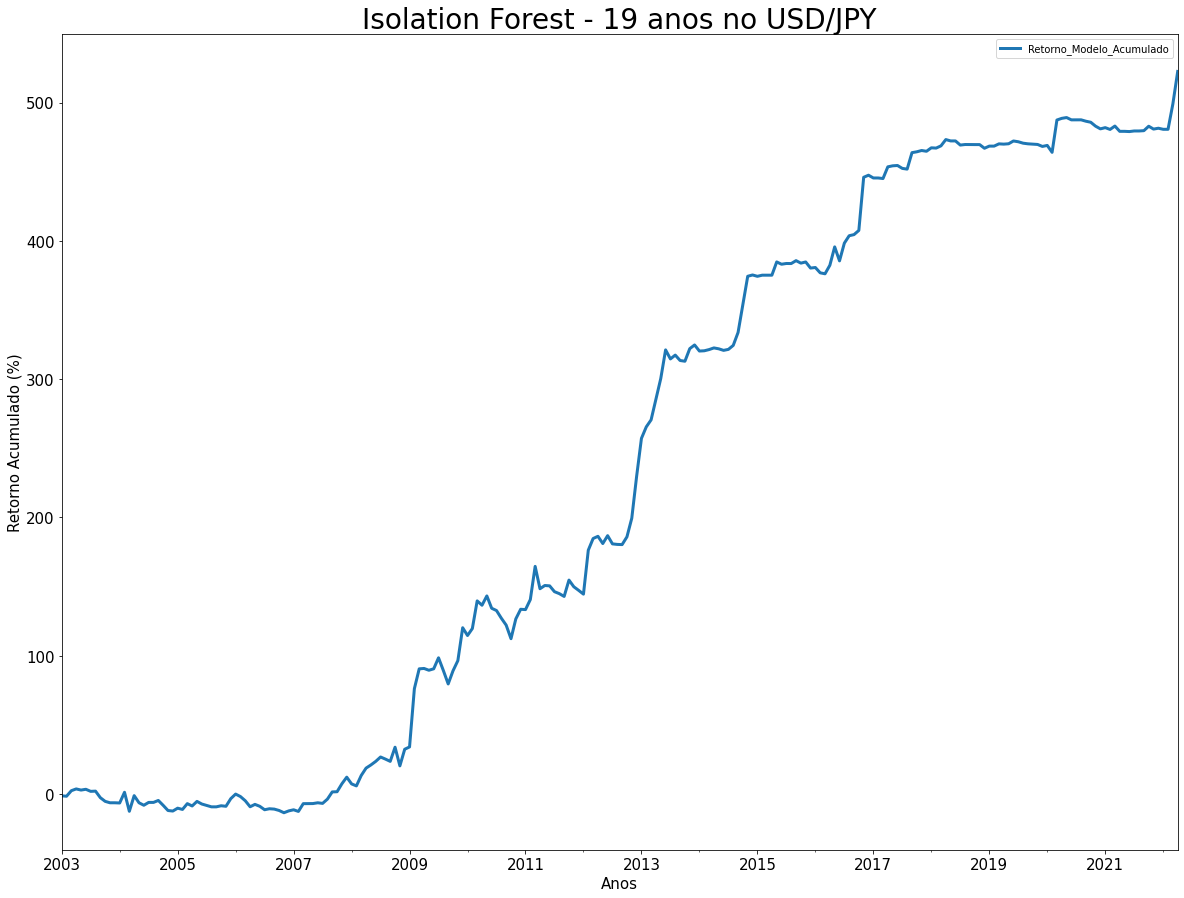

In [80]:
teste_agregado["Retorno_Modelo_Acumulado"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel("Anos"
           , fontsize = 15);
plt.ylabel("Retorno Acumulado (%)"
           , fontsize = 15);
plt.title("Isolation Forest - 19 anos no USD/JPY", fontsize = 28)
plt.legend()
plt.show()

In [81]:
# Tipo de tabela dinamica
summary = df1_filtrado.copy()
summary["Date"] = pd.to_datetime(summary["Date"], format = "%Y-%m")

summary = summary.groupby([summary["Date"].dt.year]).agg({"Retorno_Modelo": sum}) # agg = agregando

summary.index = summary.index.set_names(["Ano"])

summary*100

,Retorno_Modelo
Ano,
1987,56.594606
1988,48.101165
1989,108.135106
1990,96.228789
1991,44.367024
1992,39.192499
1993,53.727087
1994,46.336905
1995,144.220286


In [82]:
summary_mes = df1_filtrado.copy()
summary_mes["Date"] = pd.to_datetime(summary_mes["Date"], format = "%Y-%m")

summary_mes = summary_mes.groupby([summary_mes["Date"].dt.year, summary_mes["Date"].dt.month]).agg({"Retorno_Modelo": sum})

summary_mes.index = summary_mes.index.set_names(["Ano", "Mes"])

summary_mes*100

Retorno_Modelo
Ano  Mes                
1987 1          4.470424
     2          3.696874
     3          0.130081
     4          2.667350
     5          3.611497
...                  ...
2021 12         0.630132
2022 1          0.000000
     2          0.000000
     3         20.111829
     4         24.365908

[424 rows x 1 columns]

In [84]:
print("--- Joveminino: Resultado Isolation Forest de 1987 à 2022 ---")
print("")
print("Treinamento: 1987-2002")
print("Teste      : 2004-2022")
print("Sem uso de stop - custos operacionais não incluídos")
print("---------------------------------------------------")
print("")
print("Pior retorno mensal:     {} %".format(round(summary_mes["Retorno_Modelo"].min(), 3)*100))
print("Melhor retorno mensal:   {} %".format(round(summary_mes["Retorno_Modelo"].max(), 3)*100))
print("Média ganho mensal:      {} %".format(round(summary_mes["Retorno_Modelo"].mean(), 2)*100))
print("---------------------------------")
print("Pior retorno anual:      {} %".format(round(summary["Retorno_Modelo"].min(), 3)*100))
print("Melhor retorno anual:    {} %".format(round(summary["Retorno_Modelo"].max(), 3)*100))
print("Média ganho anual:       {} %".format(round(summary["Retorno_Modelo"].mean(), 2)*100))
print("---------------------------------")
print("# Anos negativos:        {}".format((summary["Retorno_Modelo"] < 0).sum()))
print("# Anos positivos:        {}".format((summary["Retorno_Modelo"] > 0).sum()))
print("---------------------------------")
print("# Meses negativos:       {}".format((summary_mes["Retorno_Modelo"] < 0).sum()))
print("# Meses positivos:       {}".format((summary_mes["Retorno_Modelo"] > 0).sum()))
print("---------------------------------")
print("# Total(simples):        {} %".format(round(summary_mes["Retorno_Modelo"].sum(), 3)*100))

--- Joveminino: Resultado Isolation Forest de 1987 à 2022 ---

Treinamento: 1987-2002
Teste      : 2004-2022
Sem uso de stop - custos operacionais não incluídos
---------------------------------------------------

Pior retorno mensal:     0.0 %
Melhor retorno mensal:   43.0 %
Média ganho mensal:      6.0 %
---------------------------------
Pior retorno anual:      8.9 %
Melhor retorno anual:    175.2 %
Média ganho anual:       66.0 %
---------------------------------
# Anos negativos:        0
# Anos positivos:        36
---------------------------------
# Meses negativos:       0
# Meses positivos:       359
---------------------------------
# Total(simples):        2366.7000000000003 %


In [93]:
import pickle 

arquivo = 'if1_USDJPYP1.sav'
pickle.dump(if1_USDJPY , open(arquivo, 'wb'))

-------
### Passo 11 -  modelo na pratica

In [94]:
df1.tail()

,open,high,low,close,Lag_P5,High_low,Retorno,Alvo1,Alvo1_Bin,High_low_P5,...,I,abertura_bb,RSI14,RSI2,STOC,ATR14,ADX,EMA,ICK,MACD
Data,,,,,,,,,,,,,,,,,,,,,
2022-04-20,128.865,129.400,127.458,127.713,125.942,1,0.014062,-0.002255,0,1,...,0.076707,6.295764,75.963171,49.997853,76.009670,1.041139,72.816092,126.575461,125.56125,2.022554
2022-04-21,127.719,128.704,127.719,128.281,126.372,1,0.015106,0.000210,1,1,...,0.074988,6.635128,77.698955,66.494572,81.177460,1.037558,73.848789,126.916569,126.03875,2.048910
2022-04-22,128.281,129.111,127.737,128.535,126.356,1,0.017245,0.018260,1,1,...,0.084610,6.647826,78.448448,74.128471,85.420529,1.061589,74.861201,127.240255,126.20750,2.066472
2022-04-23,128.536,128.566,128.462,128.537,126.940,1,0.012581,0.009507,1,1,...,0.084353,6.476428,78.454588,74.220968,84.973011,0.993190,75.801298,127.499604,126.26450,2.056841
2022-04-25,128.553,128.866,127.521,128.016,128.864,0,-0.006581,0.014654,1,1,...,0.052413,6.267720,72.648070,25.927033,74.308521,1.018319,74.844287,127.602883,126.48150,1.984295


In [100]:
import sqlite3
from sqlite3 import Error

In [101]:
def conexao(db):
    global conex
    try:
        conex = sqlite3.connect(db)
        print("Conexao realizada")
    except Error as e:
        print(e)

In [102]:
conexao("C:\\sqlite\\databases\\USDJPY.db")

Conexao realizada


In [103]:
# Carrega o modelo
import pickle
meu_modelo = pickle.load(open("if1_USDJPYP.sav", "rb"))

In [104]:
# Carrega a tabela do BD - Isto é feito apenas 1 vez, para passar a sua base inteira para o SQLite
# Delete esta cèlula depois disto

pd.read_csv("USDJPY.csv", sep = ",").to_sql(name = "USDJPY", con = conex, index = False)

In [105]:
# Isto daqui é o que voce vai fazer no dia a dia

# Escreve o novo registro no banco de dados
ponteiro = conex.cursor()
ponteiro.execute("""INSERT INTO USDJPY (data, hora, open, high,low,close,volume )
                VALUES ("02/05/2022", "00:00", "129.751", "130.478", "129.612", "130.113","0")""")
conex.commit()

In [106]:
def cria_variaveis(df):
    df1 = df
    df1["data"] = pd.to_datetime(df1["data"]).dt.normalize()
    df1 = df1.set_index("data")
    df1.reset_index(inplace=True)
    # Lag de x periodos
    periodos = 5
    # Calculo do retorno

    df1["Retorno"] = df1["close"].pct_change(periodos)
    # Lag positivo de x periodos
    df1["Lag_P5"] = df1["close"].shift(periodos)
   # Atualização das Variaveis

    # Desvio Padrao de 5 dias
    df1["std5"] = df1["Retorno"].rolling(5).std()

    # Desvio Padrao de 10 dias
    df1["std10"] = df1["Retorno"].rolling(10).std()

    # Desvio Padrao de 15 dias
    df1["std15"] = df1["Retorno"].rolling(15).std()

    # Proporçao do corpo do candle em relacao ao range do dia
    df1["prop"] = (df1["close"]-df1["open"])/(df1["high"]-df1["low"])

    # Direçao do dia atual
    df1["dir_D"] = np.where(df1['close'] > df1['open'] , '1', '0')

    # Direçao D-1
    df1["dir_D-1"] = df1["dir_D"].shift(1)

    # Direçao D-2
    df1["dir_D-2"] = df1["dir_D"].shift(2)

    # Direçao D-3
    df1["dir_D-3"] = df1["dir_D"].shift(3)

    # Media Movel de 15 dias std5
    df1["mm_std5"] = df1["std5"].rolling(15).mean()

    # Media Movel de 15 dias std5
    df1["mm_std10"] = df1["std10"].rolling(15).mean()

    # Media Movel de 15 dias std5
    df1["mm_std15"] = df1["std15"].rolling(15).mean()

    # RSL std5
    df1["RSL_std5"] = (df1["std5"]/df1["std5"].rolling(15).mean())-1

    # RSL std10
    df1["RSL_std10"] = (df1["std10"]/df1["std10"].rolling(15).mean())-1

    # RSL std15
    df1["RSL_std15"] = (df1["std15"]/df1["std15"].rolling(15).mean())-1

    # Aplicando a fisica

    p = 5 

    # Velocidade de p dias
    df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

    # Aceleraçao de p dias
    df1["a"] = (df1["v"] - df1["v"].shift(p))/p

    # Força
    # Calculando a massa
    df1["m"] = df1["Retorno"].rolling(p).sum()
    df1["f"] = df1["m"]*df1["a"]

    # Energia cinética
    df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]


    # Trabalho 
    # cateto_oposto
    cat_op = df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
    cat_ad = p
    df1["cat"] = cat_op/cat_ad
    df1 = df1.dropna(axis = 0)
    df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

    # Energia potencial
    df1["k"] = cat_op*df1["m"]

    # Torque
    df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

    # Momentum
    df1["M"] = df1["m"]*df1["v"]

    # Gravidade
    df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())
    
    # Para o zig zag dos retornos
    df1["Retorno1"] = df1["Retorno"].shift(1)
    df1["Retorno2"] = df1["Retorno"].shift(2)

    df1["Zigzag_alta"] = np.where(((df1["Retorno"] > 0) & (df1["Retorno1"] < 0) & (df1["Retorno2"] > 0)), 1, 0)
    df1["Zigzag_baixa"] = np.where(((df1["Retorno"] < 0) & (df1["Retorno1"] > 0) & (df1["Retorno2"] < 0)), -1, 0)
    df1["Zigzag"] = df1["Zigzag_alta"] + df1["Zigzag_baixa"]

    # Variaveis de Indicadores técnicos - Biblioteca TA

    # Inicializa o indicador
    indicator_atr14 = ta.volatility.AverageTrueRange(high = df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14)

    indicator_bb = ta.volatility.bollinger_wband(close = df1["close"], window = 20, window_dev = 2)
    indicator_rsi14 = ta.momentum.RSIIndicator(close = df1["close"], window = 14)
    indicator_rsi2 = ta.momentum.RSIIndicator(close = df1["close"], window = 2)
    indicator_stoc = ta.momentum.StochasticOscillator(high= df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14, smooth_window = 3)
    indicator_adx = ta.trend.ADXIndicator(high = df1["high"], low= df1["low"], close = df1["close"], window= 14)
    indicator_ichimoko = ta.trend.IchimokuIndicator(high= df1["high"], low = df1["low"], window1 = 9, window2 = 26, window3= 52)
    indicator_macd  =ta.trend.MACD(close= df1["close"], window_slow = 26, window_fast = 12, window_sign = 9)
    indicator_ema = ta.trend.EMAIndicator(close = df1["close"], window= 9)
    # Variavel abertura das bandas
    df1["abertura_bb"] = indicator_bb
    df1["RSI14"] = indicator_rsi14.rsi()
    df1["RSI2"] = indicator_rsi2.rsi()
    df1["STOC"] = indicator_stoc.stoch()
    df1["ATR14"] = indicator_atr14.average_true_range()
    df1["ADX"] = indicator_adx.adx()
    df1["EMA"] = indicator_ema.ema_indicator()
    df1["ICK"] = indicator_ichimoko.ichimoku_a()
    df1["MACD"] = indicator_macd.macd()

    # Filtrando os valores missing

    df1_filtrado = df1.dropna(axis = 0) 

    df1_filtrado = df1_filtrado.drop(["mm_std5", "mm_std10", "mm_std15", "Retorno1"
                                  , "Retorno2", "Zigzag_alta", "Zigzag_baixa"
                                 ], axis = 1)

    df2 = df1_filtrado.copy()

    # Resistencia - R=V/I onde V é a amplitude maxima dos ultimos retornos
    # Novo periodo
    p = 5

    df1["V_Max"] = df1["Retorno"].rolling(p).max()
    df1["V_Min"] = df1["Retorno"].rolling(p).min()
    df1["I"] = df1["Retorno"].rolling(p).sum()
    
    corte = 5

    df1_filtrado["RSL_std5"] = pd.qcut(df1_filtrado["RSL_std5"], corte, labels = False)
    df1_filtrado["RSL_std10"] = pd.qcut(df1_filtrado["RSL_std10"], corte, labels = False)
    df1_filtrado["RSL_std15"] = pd.qcut(df1_filtrado["RSL_std15"], corte, labels = False)
    df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
    df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
    df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
    df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
    df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
    df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
    df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
    df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
    df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
    df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)
    
    return(df1_filtrado)

In [108]:
# Recupera a tabela do SQLite

base = cria_variaveis(
    pd.read_sql(
        "select data, open, high, low, close from USDJPY"
        , conex)
)

In [109]:
base.columns[3:47]

Index(['low', 'close', 'Retorno', 'Lag_P5', 'std5', 'std10', 'std15', 'prop',
       'dir_D', 'dir_D-1', 'dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10',
       'RSL_std15', 'v', 'a', 'm', 'f', 'T', 'cat', 'w', 'k', 'tau', 'M', 'g',
       'Zigzag', 'abertura_bb', 'RSI14', 'RSI2', 'STOC', 'ATR14', 'ADX', 'EMA',
       'ICK', 'MACD'],
      dtype='object')

In [110]:
# Funçao para a prediçao

def predicao (tab):
    aux = meu_modelo.predict(tab.iloc[:, 4:base.shape[1]])
    aux = np.where(aux == -1, 1, 0)
    mensagem = np.where(aux[-1] == 1, "Compra", "Vende")
    return (print("Previsao para amanha: " + str(mensagem)))

In [111]:
predicao(base)

Previsao para amanha: Compra


In [99]:
conex.close()